In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:

# Step 2: Calculate WMA
def calculate_wma(series, period):
    weights = np.arange(1, period + 1)
    return series.rolling(period).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

# Step 3: Calculate HMA
def calculate_hma(data, period=20):
    wma_half_period = calculate_wma(data['Close'], period // 2)
    wma_full_period = calculate_wma(data['Close'], period)
    intermediate_wma = 2 * wma_half_period - wma_full_period
    hma = calculate_wma(intermediate_wma, int(np.sqrt(period)))
    data['HMA'] = hma
    return data



In [7]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply HMA calculation
    period = 20  # You can adjust the period
    data = calculate_hma(data, period)
    
    # Step 4: Plot Close Price and HMA
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.6)
    plt.plot(data['HMA'], label=f'HMA ({period})', color='green', linewidth=2)
    plt.title(f'Hull Moving Average (HMA) for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


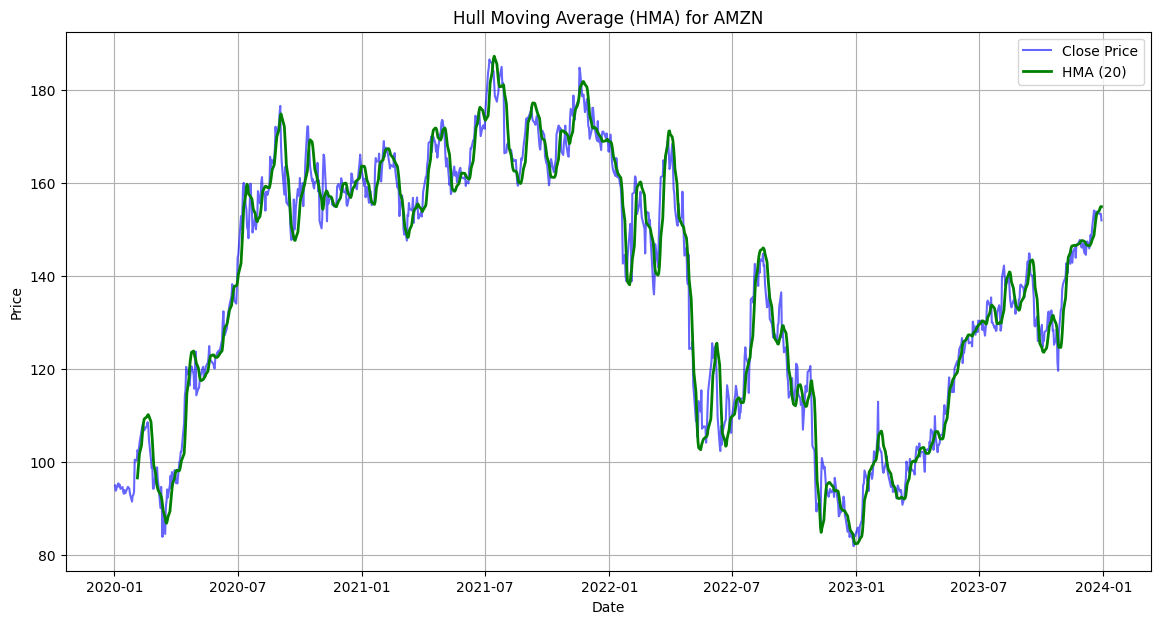

In [8]:
show_graph("AMZN")